In [ ]:
#do clustering here, parts b) and c)

In [50]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score

import matplotlib.pyplot as plt

In [45]:
full_df = pd.read_csv('data.csv')
df = full_df.drop(columns=['_stemmed', '_title'])
display(full_df)

,aanmdof,aanmdof robot,abandon,abattoir,abe,abe scheme,abil,abil detect,abil learn,abil model,...,zip,zipper,zolb,zone,zupt,zynq,œuf,μm,_stemmed,_title
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,anomali detect wide area imageri studi detect ...,Anomaly detection in wide area imagery
1,0.0,0.0,0.0,0.0,0.0,0.0,0.023310,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,person re-identif deep kronecker-product match...,Person re-identification with deep kronecker-p...
2,0.0,0.0,0.0,0.0,0.0,0.0,0.084704,0.153873,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,crack detect imag masonri use cnn signific bod...,Crack detection in images of masonry using cnns
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,toward energi effici code gener mobil phone us...,Towards an energy efficient code generator for...
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,sub-polyhedr schedul use unit- two-variable-pe...,Sub-polyhedral scheduling using (Unit-)two-var...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.06849,0.0,0.0,0.0,0.0,colorimetr point-of-car paper-bas sensor urina...,Colorimetric point-of-care paper-based sensors...
1139,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,calcium identif score base echocardiographi ex...,Calcium identification and scoring based on ec...
1140,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,consid filter import irreplac filter prune dee...,Considering filter importance and irreplaceabi...
1141,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,low-complex bit-seri sequenti polynomi basi fi...,Low-complexity bit-serial sequential polynomia...


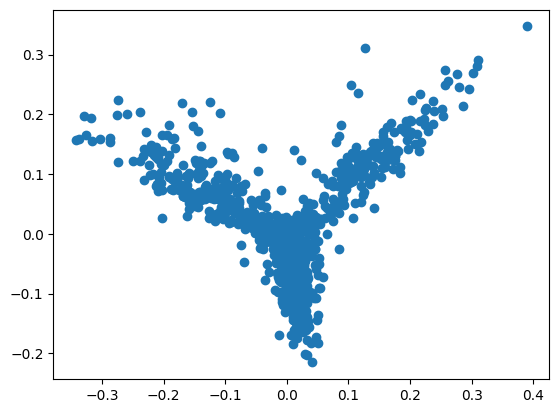

In [46]:
pca = PCA(n_components=2).fit_transform(df)
plt.scatter(pca[:, 0], pca[:, 1])

# no idea why plot looks this way

C:\Users\iliaz\.virtualenvs\textclustering\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


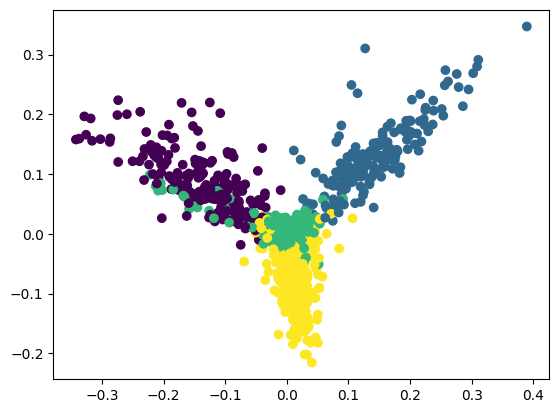

Davies-Bouldin score: 8.75691011096584
Top words for each cluster:


secur           0.089761
encrypt         0.058472
quantum         0.049442
scheme          0.046844
key             0.042826
cryptographi    0.042730
protocol        0.038015
attack          0.035492
iot             0.031993
data            0.030496
dtype: float64

databas          0.132983
data             0.072222
relat            0.068039
queri            0.062745
relat databas    0.056427
system           0.034362
sql              0.032855
ontolog          0.031703
inform           0.028988
model            0.026345
dtype: float64

compil      0.091588
program     0.050346
languag     0.038711
code        0.038173
graph       0.027631
optim       0.027441
memori      0.026568
quantum     0.025789
parallel    0.025343
use         0.022413
dtype: float64

robot     0.045650
imag      0.028185
detect    0.023904
method    0.022902
use       0.022620
model     0.022028
learn     0.021870
system    0.021242
vision    0.019508
object    0.018695
dtype: float64

In [56]:
# 3 and 4 give most meaningful results
K = 4

kmeans = KMeans(n_clusters=K)
kmeans.fit(df)
y_pred = kmeans.predict(df)
plt.scatter(pca[:, 0], pca[:, 1], c=y_pred)
plt.show()

print('Davies-Bouldin score:', davies_bouldin_score(df, y_pred))

df_pred = df.copy()
df_pred['_cluster'] = y_pred

print('Top words for each cluster:')
for i in range(K):
    display(df_pred[df_pred['_cluster'] == i].drop(columns='_cluster').mean().sort_values(ascending=False).iloc[:10])
    
# With K = 3 documents are split into 3 topics: Computer Vision, Databases and Cryptography